In [84]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [85]:
x,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [86]:
df = pd.DataFrame(x,columns=['col1','col2','col3','col4','cols5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,cols5,target
0,2.683203,1.895750,-0.872523,2.248218,-0.078573,0
1,2.831483,2.139227,-1.710080,0.668289,-0.694397,0
2,-0.383261,3.147400,-1.590137,1.030429,-3.067735,1
3,-2.174182,4.234238,-2.508632,0.708132,-2.741305,1
4,1.052669,1.315484,-1.977539,-0.517838,-0.529420,0


In [87]:
# function for row sampline with replacement
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)


In [88]:
df.sample(6,replace=True)

,col1,col2,col3,col4,cols5,target
74,-3.246049,0.218978,-0.757356,1.595463,0.212758,1
87,-0.584811,-1.166519,-0.185181,3.621528,-0.322488,1
79,1.605654,0.874678,-0.476228,1.738921,1.705854,0
61,-0.041750,1.034478,-2.273439,-2.015482,-3.051486,0
52,-0.305964,0.794013,-3.407307,-4.409906,-1.895595,0
92,0.470002,0.331928,-0.730051,1.059445,0.045924,0


In [111]:
# function for column sampling with replacement
from numpy import random
def sample_columns(df,percent):
  cols=random.sample(df.columns.tolist()[:-1],int(percent*df.shape[1]-1))
  return df[cols]
  

In [122]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_columns(new_df,col_percent)

In [90]:
df.columns.tolist()[:-1]


['col1', 'col2', 'col3', 'col4', 'cols5']

In [91]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_columns(new_df,col_percent)

In [92]:
# first with row sampling
df1 = sample_rows(df,0.2)
df2=sample_rows(df,0.2)
df3=sample_rows(df,0.2)


In [93]:
df1.shape

(20, 6)

In [94]:
df2.shape

(20, 6)

In [95]:
df3 

,col1,col2,col3,col4,cols5,target
93,-0.156235,0.297999,-0.597846,0.716718,-2.193410,0
59,-2.259353,1.927954,-0.997988,0.817418,-2.049307,1
77,-0.063421,-0.781920,0.127753,0.596223,1.598336,0
29,-1.241340,0.276472,-0.036802,1.739211,0.014869,1
75,2.208598,1.279495,0.071260,3.368143,-0.259282,0
79,1.605654,0.874678,-0.476228,1.738921,1.705854,0
60,1.804368,0.740669,-0.666281,1.969197,-2.919683,1
80,-1.859770,1.889982,-2.113098,0.186782,0.125634,1
79,1.605654,0.874678,-0.476228,1.738921,1.705854,0
77,-0.063421,-0.781920,0.127753,0.596223,1.598336,0


In [113]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [114]:
clf1.fit(df1.iloc[:,:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:5],df1.iloc[:,-1])
clf3.fit(df3.iloc[:,:5],df1.iloc[:,-1])

DecisionTreeClassifier()

In [98]:
from sklearn.tree import plot_tree

[Text(0.5, 0.8333333333333334, 'x[0] <= -0.265\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.25, 0.5, 'x[2] <= -2.272\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.75, 0.5, 'x[1] <= -0.522\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

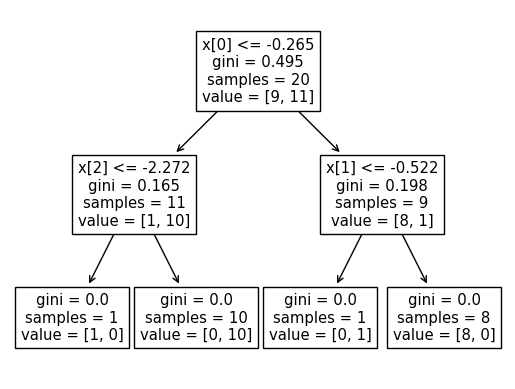

In [115]:
plot_tree(clf1)

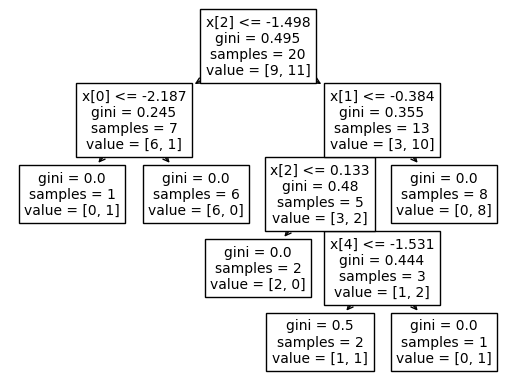

In [116]:
plot_tree(clf2);

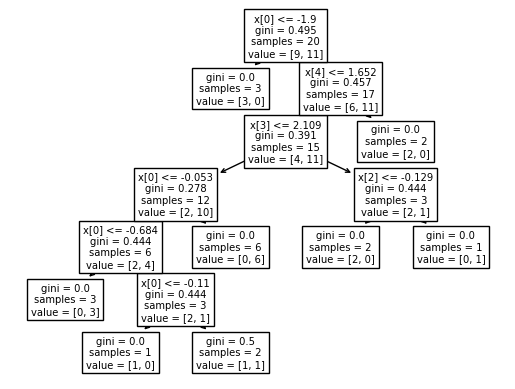

In [117]:
plot_tree(clf3);

In [118]:
# we are checking with one row of data with each model becuase our ensemble model output will be based on majority count.
clf1.predict(np.array([-3.246049,	0.218978,	-0.757356,	1.595463,	0.212758]).reshape(1,5))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [119]:
clf2.predict(np.array([-3.246049,	0.218978,	-0.757356,	1.595463,	0.212758]).reshape(1,5))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [120]:
clf3.predict(np.array([-3.246049,	0.218978,	-0.757356,	1.595463,	0.212758]).reshape(1,5))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])